**Download IODv4 Toolkit**

In [0]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!pip install -r OIDv4_ToolKit/requirements.txt

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 399, done.
remote: Total 399 (delta 0), reused 0 (delta 0), pack-reused 399
Receiving objects: 100% (399/399), 34.05 MiB | 43.92 MiB/s, done.
Resolving deltas: 100% (129/129), done.
     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 5.4MB 45.0MB/s 
     |████████████████████████████████| 51kB 28.5MB/s 
  Found existing installation: botocore 1.12.153
    Uninstalling botocore-1.12.153:
      Successfully uninstalled botocore-1.12.153
  Found existing installation: rsa 4.0
    Uninstalling rsa-4.0:
      Successfully uninstalled rsa-4.0


**Download dataset from OpenImages using OID Toolkit**

In [0]:
# !rm -r OID
# !rm -r OID/Dataset/train
!python3 OIDv4_ToolKit/main.py downloader \
          --classes Orange --type_csv train \
          --limit 200
#           --sub h \
#           --image_IsOccluded 0 \

!python3 OIDv4_ToolKit/main.py downloader \
          --classes Orange --type_csv test  \
          --limit 40
#           ---sub h \
#           --image_IsOccluded 0 \


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Orange.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 45838 KB/s, 0 seconds passed
[DOWNLOAD] | File c

**Install required packages for converting OIDv4 labels to a single CSV file**

Based on 
https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html

In [0]:
!rm -r SingleObjectDetectionUsingTensorFlow
!git clone https://github.com/elementzonline/SingleObjectDetectionUsingTensorFlow.git

rm: cannot remove 'SingleObjectDetectionUsingTensorFlow': No such file or directory
Cloning into 'SingleObjectDetectionUsingTensorFlow'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 71 (delta 34), reused 52 (delta 18), pack-reused 0
Unpacking objects: 100% (71/71), done.


**Convert labels to PASCAL VOC xml format**

In [0]:
# !python SingleObjectDetectionUsingTensorFlow/label_to_csv.py \
#                  -i OID/Dataset/train/Orange \
#                  -o train_labels.csv -c Orange


# !python SingleObjectDetectionUsingTensorFlow/label_to_csv.py \
#                  -i OID/Dataset/test/Orange \
#                  -o test_labels.csv -c Orange

!python SingleObjectDetectionUsingTensorFlow/oid_to_pascal_voc_xml.py


# !python SingleObjectDetectionUsingTensorFlow/label_to_csv.py \
#                  -i OID/Dataset/test/Orange \
#                  -o test_labels.csv -c Orange

Currently in Subdirectory: train

Creating PASCAL VOC XML Files for Class: Orange
100% 200/200 [00:02<00:00, 81.83it/s]
Currently in Subdirectory: test

Creating PASCAL VOC XML Files for Class: Orange
100% 40/40 [00:00<00:00, 104.17it/s]


**Collect XML files to create single CSV file**

In [0]:
!python SingleObjectDetectionUsingTensorFlow/xml_to_csv.py \
                 -i OID/Dataset/train/Orange/To_PASCAL_XML \
                 -o train_labels.csv

!python SingleObjectDetectionUsingTensorFlow/xml_to_csv.py \
                 -i OID/Dataset/test/Orange/To_PASCAL_XML \
                 -o test_labels.csv

Successfully converted xml to csv.
Successfully converted xml to csv.


**Install required packages for creating TFRecord file**

In [0]:
!git clone https://github.com/tensorflow/models.git
%cd models
!git fetch && git fetch --tags
!git checkout v1.13.0
%cd ../
!pip install tensorflow==1.13.1
!pip install pandas==0.24.2

Cloning into 'models'...
remote: Enumerating objects: 26315, done.
remote: Total 26315 (delta 0), reused 0 (delta 0), pack-reused 26315
Receiving objects: 100% (26315/26315), 508.77 MiB | 42.17 MiB/s, done.
Resolving deltas: 100% (15865/15865), done.
Checking out files: 100% (2978/2978), done.
/content/models
Note: checking out 'v1.13.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 57e07520 Revert "tf_upgrade_v2 on resnet and utils folders. (#6154)" (#6162)
/content


**Create TFRecod for test and train models**

This will create train.record and test.record in /content

In [0]:
!python SingleObjectDetectionUsingTensorFlow/generate_tfrecord.py \
           --label=Orange --csv_input=train_labels.csv \
           --output_path=train.record \
           --img_path=OID/Dataset/train/Orange

!python SingleObjectDetectionUsingTensorFlow/generate_tfrecord.py \
          --label=Orange --csv_input=test_labels.csv \
          --output_path=test.record \
          --img_path=OID/Dataset/test/Orange

Successfully created the TFRecords: /content/train.record
Successfully created the TFRecords: /content/test.record


**Get the initial pretrained data**


In [0]:
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz  -O ssd_inception_v2_coco.tar.gz

--2019-05-26 16:00:47--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278114232 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco.tar.gz’

ssd_inception_v2_co 100%[===================>] 265.23M   174MB/s    in 1.5s    

2019-05-26 16:00:48 (174 MB/s) - ‘ssd_inception_v2_coco.tar.gz’ saved [278114232/278114232]



**Extract the pretrained data**

In [0]:
!tar xvzf ssd_inception_v2_coco.tar.gz
!mv ssd_inception_v2_coco_2018_01_28 ssd_inception_v2_coco

ssd_inception_v2_coco_2018_01_28/
ssd_inception_v2_coco_2018_01_28/model.ckpt.index
ssd_inception_v2_coco_2018_01_28/checkpoint
ssd_inception_v2_coco_2018_01_28/pipeline.config
ssd_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2018_01_28/model.ckpt.meta
ssd_inception_v2_coco_2018_01_28/saved_model/
ssd_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
ssd_inception_v2_coco_2018_01_28/saved_model/variables/
ssd_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


**Create protoc files**

In [0]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
%cd /content

/content/models/research
/content


**Setup Ngrock for tensorboard**

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-05-26 16:01:07--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.36.121, 34.206.253.53, 34.231.75.48, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.36.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  70.2MB/s    in 0.2s    

2019-05-26 16:01:08 (70.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
!mkdir training
LOG_DIR = './training'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://edeb47d6.ngrok.io


**Begin training**

In [0]:
# !python SingleObjectDetectionUsingTensorFlow/train.py \
#         --logtostderr \
#         --train_dir=training/ \
#         --pipeline_config_path=SingleObjectDetectionUsingTensorFlow/ssd_inception_v2_coco.config

!python SingleObjectDetectionUsingTensorFlow/model_main.py \
    --pipeline_config_path=SingleObjectDetectionUsingTensorFlow/ssd_inception_v2_coco.config \
    --model_dir=training/ \
    --alsologtostderr
#     --num_train_steps={num_steps} \
#     --num_eval_steps={num_eval_steps}


# !python SingleObjectDetectionUsingTensorFlow/model_tpu_main.py \
#     --pipeline_config_path=SingleObjectDetectionUsingTensorFlow/ssd_inception_v2_coco.config \
#     --model_dir=training/ \
#     --alsologtostderr


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
2019-05-26 18:53:39.038785: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-26 18:53:39.039024: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x169e66e0 executing computations on platform Host. Devices:
2019-05-26

**Export Inference Graph**

In [0]:
import re
import numpy as np
import os
model_dir = 'training'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')
last_model_path = os.path.join(model_dir, last_model)
print("using ", last_model_path)

# need to change the model name in the below command
!rm -r output
!python SingleObjectDetectionUsingTensorFlow/export_inference_graph.py \
             --input_type image_tensor \
             --pipeline_config_path SingleObjectDetectionUsingTensorFlow/ssd_inception_v2_coco.config \
             --trained_checkpoint_prefix {last_model_path} \
             --output_directory /content/output

using  training/model.ckpt-34607
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
166 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-o

In [0]:
# Download the inference graph
from google.colab import files
files.download('/content/output/frozen_inference_graph.pb') 

MessageError: ignored

**Test some of the images**


['/content/OID/Dataset/test/Orange/3ea796fbbc23b3b9.jpg', '/content/OID/Dataset/test/Orange/75f3547e656b55b1.jpg', '/content/OID/Dataset/test/Orange/8a32ad6d6dcc35ab.jpg', '/content/OID/Dataset/test/Orange/1f846aaff9505c67.jpg', '/content/OID/Dataset/test/Orange/f2186ee3b41142a6.jpg', '/content/OID/Dataset/test/Orange/3abf8c716190e5ff.jpg']


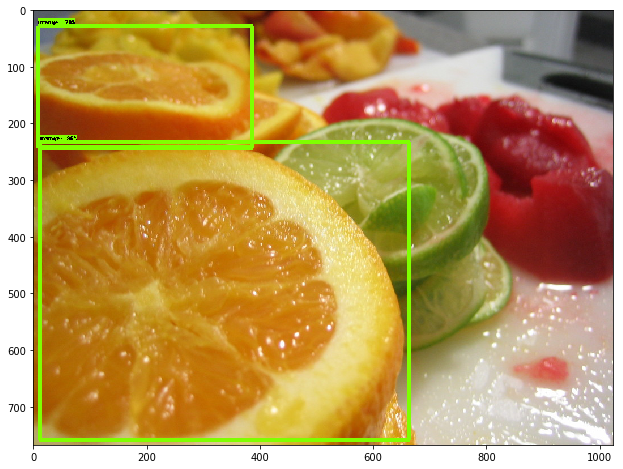

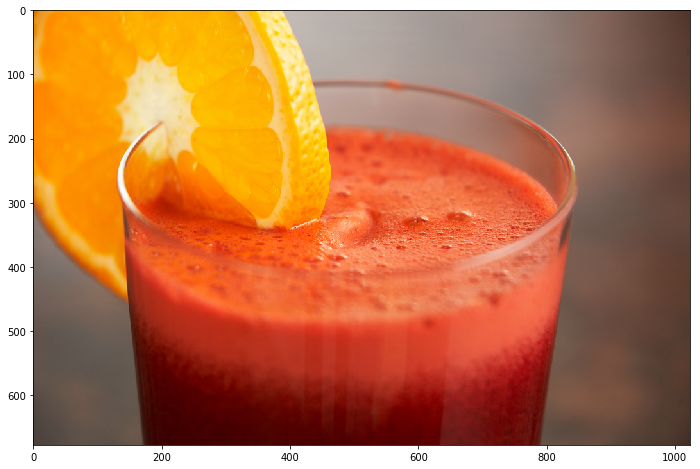

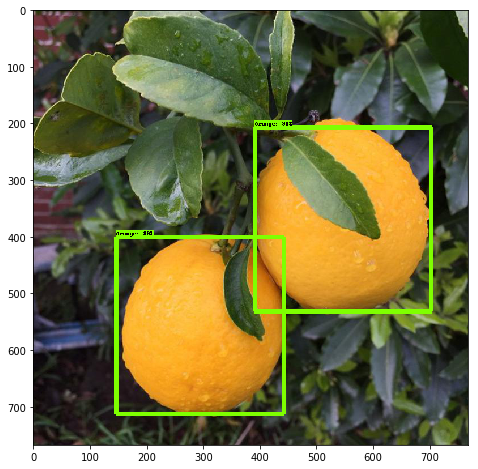

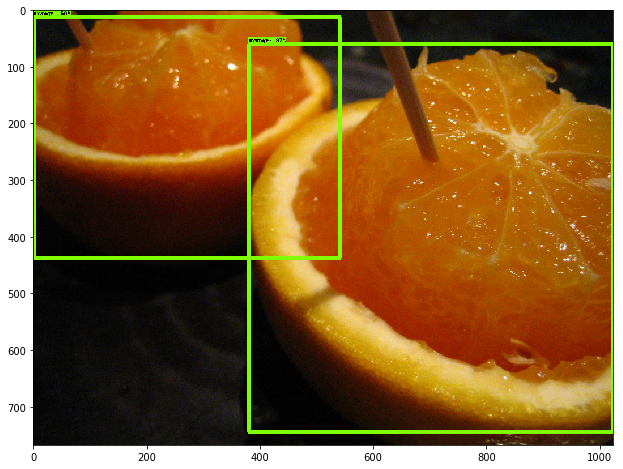

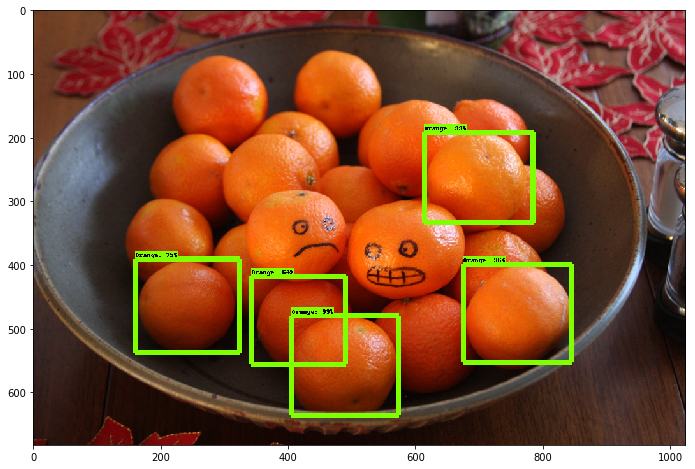

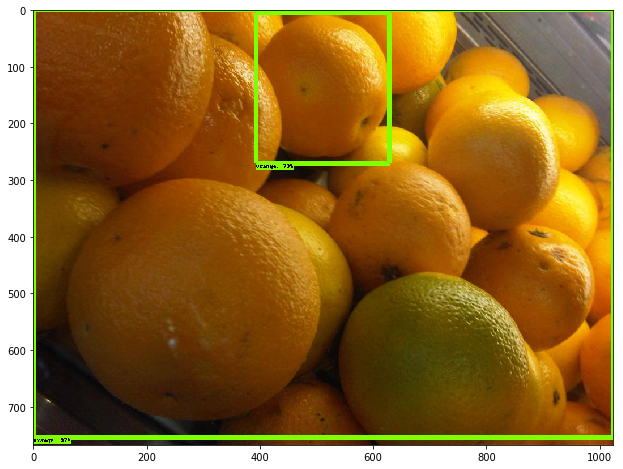

In [0]:
%matplotlib inline
# !python SingleObjectDetectionUsingTensorFlow/test.py /content/OID/Dataset/train/Orange/000d1976fc8ebfe7.jpg

# TEST_IMAGE_PATHS = ['/content/OID/Dataset/test/Orange/f85855d6edaa9362.jpg']
import os
import glob
all_images = glob.glob(os.path.join('/content/OID/Dataset/test/Orange/', "*.jpg"))
TEST_IMAGE_PATHS = all_images[slice(15,21)]
print(TEST_IMAGE_PATHS)

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

sys.path.append("models/research/")
sys.path.append("models/research/slim")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile('output/frozen_inference_graph.pb', 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap('SingleObjectDetectionUsingTensorFlow/annotations/label_map.pbtxt')
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=1, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict
  

for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # print(output_dict)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
               